<a href="https://colab.research.google.com/github/datacentertugaskuliah-coder/PraktikumDS/blob/main/Logistic_Regression_untuk_Deteksi_Uang_Asli_vs_Palsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Metadata Dataset Banknote Authentication ===
{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0



Nama kolom fitur: ['variance', 'skewness', 'curtosis', 'entropy']
Distribusi kelas (0 = authentic, 1 = forged):
class
0    762
1    610
Name: count, dtype: int64

Ukuran data latih: (1097, 4)
Ukuran data uji  : (275, 4)

Akurasi Model Logistic Regression: 0.9855

=== Classification Report ===
              precision    recall  f1-score   support

   authentic       1.00      0.97      0.99       153
      forged       0.97      1.00      0.98       122

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275


Confusion Matrix:
 [[149   4]
 [  0 122]]


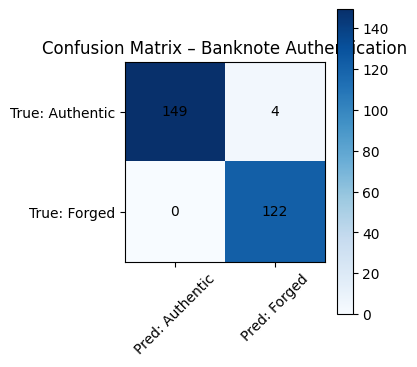

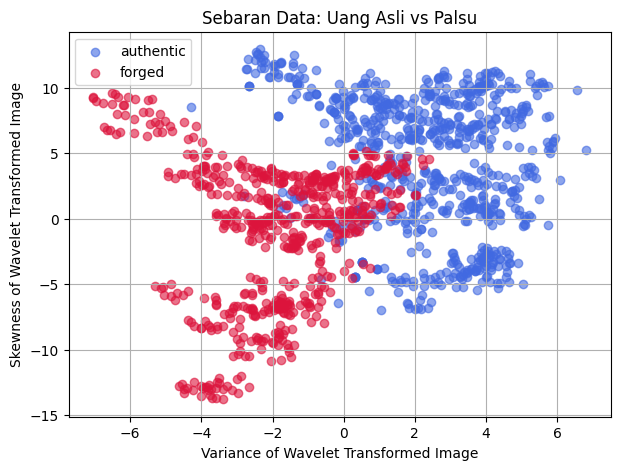

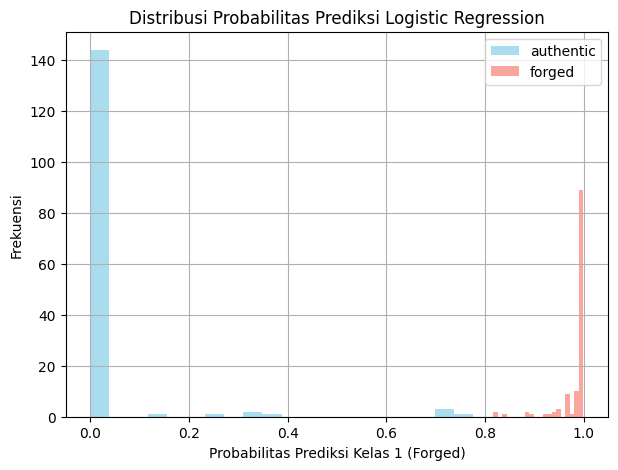

In [3]:
# ==========================================================
# Praktikum Data Science dan Machine Learning Berbasis Python dan UCI Repository
# Kode Program – Logistic Regression untuk Deteksi Uang Asli vs Palsu
# Dataset: Banknote Authentication (UCI Machine Learning Repository, id=267)
# Repo: https://github.com/datacentertugaskuliah-coder/PraktikumDS.git
# Lingkungan: Google Colab
# ==========================================================

# 0. Instalasi pustaka ucimlrepo
!pip install ucimlrepo -q

# 1. Import pustaka
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Ambil dataset Banknote Authentication dari UCI
banknote_authentication = fetch_ucirepo(id=267)

print("=== Metadata Dataset Banknote Authentication ===")
print(banknote_authentication.metadata)

print("\n=== Informasi Variabel ===")
print(banknote_authentication.variables.head())

# 3. Data sebagai pandas DataFrame
X = banknote_authentication.data.features.copy()          # fitur
y = banknote_authentication.data.targets.copy().squeeze() # target sebagai 1D Series

print("\nUkuran fitur (X):", X.shape)
print("Ukuran target (y):", y.shape)

print("\nLima baris pertama data:")
display(pd.concat([X, y.rename("class")], axis=1).head())

print("\nNama kolom fitur:", list(X.columns))
print("Distribusi kelas (0 = authentic, 1 = forged):")
print(y.value_counts())

# 4. Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nUkuran data latih:", X_train.shape)
print("Ukuran data uji  :", X_test.shape)

# 5. Membangun dan melatih model Logistic Regression
model = LogisticRegression(
    max_iter=1000,
    solver="liblinear"
)
model.fit(X_train, y_train)

# 6. Prediksi dan evaluasi
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

akurasi = accuracy_score(y_test, y_pred)
print("\nAkurasi Model Logistic Regression:", round(akurasi, 4))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["authentic", "forged"]))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# 7. Visualisasi Confusion Matrix
plt.figure(figsize=(4, 4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix – Banknote Authentication")
plt.colorbar()
plt.xticks([0, 1], ["Pred: Authentic", "Pred: Forged"], rotation=45)
plt.yticks([0, 1], ["True: Authentic", "True: Forged"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")
plt.tight_layout()
plt.show()

# 8. Visualisasi sebaran dua fitur utama (variance vs skewness)
plt.figure(figsize=(7, 5))
plt.scatter(
    X.loc[y == 0, "variance"],
    X.loc[y == 0, "skewness"],
    alpha=0.6, color="royalblue", label="authentic"
)
plt.scatter(
    X.loc[y == 1, "variance"],
    X.loc[y == 1, "skewness"],
    alpha=0.6, color="crimson", label="forged"
)
plt.xlabel("Variance of Wavelet Transformed Image")
plt.ylabel("Skewness of Wavelet Transformed Image")
plt.title("Sebaran Data: Uang Asli vs Palsu")
plt.legend()
plt.grid(True)
plt.show()

# 9. Visualisasi distribusi probabilitas prediksi
plt.figure(figsize=(7, 5))
plt.hist(y_proba[y_test == 0], bins=20, alpha=0.7, label="authentic", color="skyblue")
plt.hist(y_proba[y_test == 1], bins=20, alpha=0.7, label="forged", color="salmon")
plt.xlabel("Probabilitas Prediksi Kelas 1 (Forged)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Probabilitas Prediksi Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()
